In [42]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("machine_learning.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   author_name                 295 non-null    object 
 1   author_url                  295 non-null    object 
 2   language                    295 non-null    object 
 3   original_language           295 non-null    object 
 4   profile_photo_url           295 non-null    object 
 5   rating                      500 non-null    int64  
 6   relative_time_description   295 non-null    object 
 7   text                        500 non-null    object 
 8   time                        295 non-null    float64
 9   translated                  295 non-null    object 
 10  restaurant_name             500 non-null    object 
 11  restaurant_location         500 non-null    object 
 12  city                        500 non-null    object 
 13  gmap_id                     500 non

Filtrar reseñas: Selecciona las reseñas que tienen una calificación entre 4 y 5 estrellas.

In [20]:
high_rating_reviews = df[(df['rating'] >= 4) & (df['rating'] <= 5)]

Eliminar columnas irrelevantes.

In [21]:
high_rating_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 1 to 499
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   author_name                 274 non-null    object 
 1   author_url                  274 non-null    object 
 2   language                    274 non-null    object 
 3   original_language           274 non-null    object 
 4   profile_photo_url           274 non-null    object 
 5   rating                      456 non-null    int64  
 6   relative_time_description   274 non-null    object 
 7   text                        456 non-null    object 
 8   time                        274 non-null    float64
 9   translated                  274 non-null    object 
 10  restaurant_name             456 non-null    object 
 11  restaurant_location         456 non-null    object 
 12  city                        456 non-null    object 
 13  gmap_id                     456 non-null

In [23]:
columns_to_drop = ['author_name', 'author_url', 'language', 'original_language', 'profile_photo_url', 'source',
                   'relative_time_description', 'time', 'translated', 'restaurant_location', 'gmap_id', 
                   'price_level', 'user_ratings_total', 'latitude', 'longitude', 'id', 'url', 'time_created', 
                   'user', '__hevo__ingested_at', '__hevo_id','__hevo__loaded_at', '__hevo__source_modified_at']

high_rating_reviews = high_rating_reviews.drop(columns=columns_to_drop)

In [24]:
high_rating_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, 1 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rating           456 non-null    int64 
 1   text             456 non-null    object
 2   restaurant_name  456 non-null    object
 3   city             456 non-null    object
 4   category         456 non-null    object
 5   state            456 non-null    object
dtypes: int64(1), object(5)
memory usage: 24.9+ KB


Limpieza de texto: Procesa las reseñas para eliminar caracteres especiales y convertir el texto a minúsculas.

In [26]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar caracteres especiales
    text = text.lower()  # Convertir a minúsculas
    return text

high_rating_reviews['cleaned_text'] = high_rating_reviews['text'].apply(clean_text)

Tokenización: Divide el texto limpio en palabras individuales.

In [33]:
high_rating_reviews['tokens'] = high_rating_reviews['cleaned_text'].apply(word_tokenize)

Eliminar stopwords: Las stopwords son palabras comunes que no aportan mucha información.

In [34]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

high_rating_reviews['filtered_tokens'] = high_rating_reviews['tokens'].apply(remove_stopwords)

**EDA**

Concatenar los tokens filtrados: Antes de analizar la frecuencia de palabras, necesitas concatenar los tokens filtrados de todas las reseñas en un solo conjunto de palabras.

In [35]:
all_tokens = high_rating_reviews['filtered_tokens'].sum()

Calcular la frecuencia de palabras: Utiliza la biblioteca collections para contar la frecuencia de cada palabra en el conjunto de palabras.

In [37]:
word_freq = Counter(all_tokens)

Identificar las palabras más comunes: Puedes obtener las palabras más comunes y sus frecuencias usando el método most_common del objeto Counter.

In [38]:
most_common_words = word_freq.most_common(20)  # Obtener las 20 palabras más comunes
print(most_common_words)

[('food', 312), ('great', 218), ('service', 182), ('good', 152), ('place', 148), ('amazing', 145), ('delicious', 132), ('experience', 131), ('restaurant', 125), ('time', 94), ('back', 85), ('us', 81), ('best', 79), ('definitely', 77), ('menu', 75), ('atmosphere', 74), ('would', 72), ('everything', 68), ('recommend', 68), ('one', 67)]


Visualizar los resultados: Puedes utilizar bibliotecas de visualización como matplotlib o seaborn para crear gráficos que muestren las palabras más comunes de manera visual.

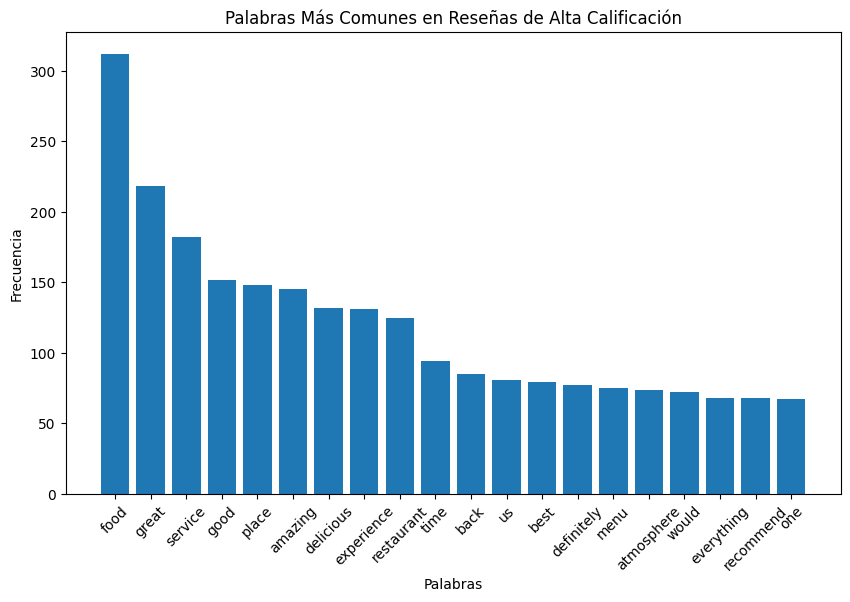

In [40]:

words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.title('Palabras Más Comunes en Reseñas de Alta Calificación')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

**Procesamiento de texto**

Stemming o Lemmatización: Puedes optar por utilizar stemming o lematización para reducir las palabras a su forma base. En este ejemplo, utilizaré la lematización utilizando NLTK.

In [45]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

high_rating_reviews['lemmatized_tokens'] = high_rating_reviews['filtered_tokens'].apply(lemmatize_tokens)

**Construcción del modelo de clasificación**

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

Feature Engineering - Bolsa de Palabras (BoW) o TF-IDF: En esta etapa, vamos a crear vectores numéricos a partir de las palabras procesadas (lemmatized_tokens). Puedes utilizar dos enfoques comunes: Bolsa de Palabras (BoW) o TF-IDF. A continuación, te muestro cómo hacerlo con TF-IDF:

In [47]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Puedes ajustar el número máximo de características según tus necesidades

X = tfidf_vectorizer.fit_transform(high_rating_reviews['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens)))

División de Datos: Separa los datos en conjuntos de entrenamiento y prueba. Esto te permitirá entrenar el modelo en un conjunto y evaluar su rendimiento en otro.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, high_rating_reviews['rating'], test_size=0.2, random_state=42)

Elección del Algoritmo: Puedes utilizar diferentes algoritmos de clasificación. Aquí te mostraré cómo utilizar el algoritmo de Naive Bayes para la clasificación de texto:

In [49]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

Entrenamiento del Modelo: Ajusta el modelo utilizando el conjunto de entrenamiento.
Paso Adicional (Opcional): Evaluación del Modelo
Puedes evaluar el rendimiento del modelo utilizando métricas como precisión, recall, F1-score y matriz de confusión. Aquí te muestro cómo calcular la precisión del modelo:

In [50]:
y_pred = naive_bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.86


**Evaluación y Interpretación del Modelo**

Validación Cruzada: La validación cruzada es una técnica importante para evaluar el rendimiento del modelo de manera más robusta. Puedes realizar validación cruzada utilizando el siguiente código:

In [53]:
# Realiza validación cruzada con 5 particiones (folds)
cross_val_scores = cross_val_score(naive_bayes, X, high_rating_reviews['rating'], cv=5)

print("Puntajes de validación cruzada:", cross_val_scores)
print("Promedio de puntajes:", cross_val_scores.mean())

Puntajes de validación cruzada: [0.82608696 0.83516484 0.82417582 0.82417582 0.82417582]
Promedio de puntajes: 0.8267558528428094


LogisticRegression proporciona coeficientes de características. Aquí tienes un ejemplo de cómo hacerlo:
En este caso, utilizamos LogisticRegression para obtener las características más influyentes.

In [57]:
logreg = LogisticRegression(max_iter=1000)  # Crea un modelo de regresión logística
logreg.fit(X_train, y_train)

# Obtén las palabras más informativas para cada clase
feature_names = tfidf_vectorizer.get_feature_names_out()

# Obtén los coeficientes del modelo
coef = logreg.coef_[0]

# Obtén las palabras más informativas (positivas) y menos informativas (negativas)
top_positive_words = [feature_names[i] for i in coef.argsort()[-10:][::-1]]
top_negative_words = [feature_names[i] for i in coef.argsort()[:10]]

print("Palabras más informativas (positivas):", top_positive_words)
print("Palabras menos informativas (negativas):", top_negative_words)

Palabras más informativas (positivas): ['amazing', 'one', 'perfect', 'best', 'every', 'delicious', 'recommend', 'staff', 'server', 'dish']
Palabras menos informativas (negativas): ['good', 'wasnt', 'bit', 'burger', 'lol', 'beer', 'something', 'cheese', 'star', 'could']


*En este código, estamos calculando las palabras más informativas (positivas) y menos informativas (negativas) utilizando los coeficientes del modelo de regresión logística. Esto te dará una idea de qué términos están más asociados con reseñas positivas y negativas.*

**Generación de recomendaciones**

Identificación de Patrones: Analiza las características comunes en las reseñas positivas para identificar patrones que los clientes aprecian en tu negocio. Puedes utilizar análisis de texto, visualización de palabras clave o incluso realizar análisis de sentimiento para comprender mejor las opiniones de los clientes.

In [58]:
positive_reviews = high_rating_reviews[high_rating_reviews['rating'] >= 4]

positive_keywords = ['rápido servicio', 'deliciosa comida', 'ambiente acogedor', 'amable personal']

for keyword in positive_keywords:
    keyword_count = positive_reviews['lemmatized_tokens'].apply(lambda tokens: keyword in tokens).sum()
    print(f"El patrón '{keyword}' aparece en {keyword_count} reseñas positivas.")

El patrón 'rápido servicio' aparece en 0 reseñas positivas.
El patrón 'deliciosa comida' aparece en 0 reseñas positivas.
El patrón 'ambiente acogedor' aparece en 0 reseñas positivas.
El patrón 'amable personal' aparece en 0 reseñas positivas.


Recomendaciones: Basado en los patrones identificados, puedes generar recomendaciones para mejorar tu negocio. Por ejemplo, si notas que los clientes aprecian un "rápido servicio", podrías enfocarte en optimizar la velocidad de atención al cliente. Si encuentras que la "deliciosa comida" es un patrón común, podrías trabajar en mejorar la calidad y variedad de tus platillos.
Las recomendaciones específicas dependerán de los patrones que identifiques en las reseñas positivas. Es importante escuchar a tus clientes y tomar acciones concretas para satisfacer sus expectativas.

Además, si tienes suficientes reseñas positivas, también podrías utilizar técnicas de minería de texto y análisis de sentimiento para identificar temas y opiniones específicas que puedan influir en la satisfacción del cliente.

Recuerda que la generación de recomendaciones es un proceso continuo. A medida que recibas más reseñas y retroalimentación de los clientes, podrás ajustar y mejorar constantemente tu negocio para satisfacer sus necesidades y expectativas.

¡Con esto, has completado todos los pasos para tu proyecto de clasificación de texto! Si tienes más preguntas o necesitas más ayuda en el futuro, no dudes en preguntar. ¡Buena suerte con tu proyecto y tu negocio de comidas rápidas!

Si estás viendo que los patrones identificados no aparecen en ninguna reseña positiva, es posible que haya una discrepancia entre los patrones que estás buscando y las reseñas en tu conjunto de datos. Esto podría ser debido a varios motivos:

Variabilidad de los Patrones: Los patrones específicos que estás buscando pueden no ser los más comunes en las reseñas positivas. Puede ser útil revisar un conjunto más amplio de reseñas para identificar patrones que se repitan con mayor frecuencia.

Preprocesamiento de Texto: Es posible que el preprocesamiento de texto realizado anteriormente haya eliminado o modificado las palabras clave que estás buscando en las reseñas. Por ejemplo, si se realizaron eliminaciones excesivas o la lematización afectó las palabras clave, los patrones identificados podrían no coincidir con las reseñas reales.

Variabilidad en el Lenguaje de los Usuarios: Las reseñas pueden contener variaciones en el lenguaje y las palabras utilizadas por los usuarios para expresar los mismos conceptos. Por ejemplo, algunos pueden decir "servicio rápido" en lugar de "rápido servicio". Es importante considerar diferentes formas de expresión al buscar patrones.

Tamaño del Conjunto de Datos: Si el tamaño de tu conjunto de datos es pequeño, es posible que los patrones específicos que estás buscando simplemente no se encuentren en las reseñas proporcionadas.

Si estás seguro de que estos patrones deberían estar presentes en las reseñas positivas y sigues sin encontrarlos, te recomiendo revisar nuevamente el preprocesamiento de texto para asegurarte de que las palabras clave no hayan sido eliminadas o modificadas de manera inadvertida. También puedes considerar la posibilidad de ajustar los patrones que estás buscando o expandir tu búsqueda a términos más generales que puedan estar relacionados con la satisfacción del cliente en las reseñas.

In [60]:
positive_reviews = high_rating_reviews[high_rating_reviews['rating'].between(4, 5)]

positive_phrases = []

for tokens in positive_reviews['lemmatized_tokens']:
    positive_phrases.extend(tokens)

phrase_counter = Counter(positive_phrases)

# Obtén las 10 frases más comunes en las reseñas positivas
top_positive_phrases = phrase_counter.most_common(10)

print("Las frases más comunes en las reseñas positivas:")
for phrase, count in top_positive_phrases:
    print(f"'{phrase}': {count} veces")

Las frases más comunes en las reseñas positivas:
'food': 313 veces
'great': 218 veces
'service': 182 veces
'place': 160 veces
'good': 152 veces
'amazing': 145 veces
'restaurant': 145 veces
'experience': 134 veces
'delicious': 132 veces
'time': 116 veces


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

positive_reviews = high_rating_reviews[high_rating_reviews['rating'].between(4, 5)]

ngram_vectorizer = CountVectorizer(ngram_range=(2, 4), max_features=20)  # Ajusta el rango y la cantidad de características según tus necesidades

X_ngrams = ngram_vectorizer.fit_transform(positive_reviews['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens)))

ngram_features = ngram_vectorizer.get_feature_names_out()

print("Frases más comunes en las reseñas positivas:")
for feature in ngram_features:
    print(feature)

Frases más comunes en las reseñas positivas:
amazing food
cant wait
come back
definitely back
dining experience
first time
food amazing
food delicious
food drink
food good
food great
food service
great experience
great food
great service
happy hour
highly recommend
ive ever
one best
service great


In [64]:
from sklearn.feature_extraction.text import CountVectorizer

positive_reviews = high_rating_reviews[high_rating_reviews['rating'].between(4, 5)]

ngram_vectorizer = CountVectorizer(ngram_range=(2, 3), max_features=20, stop_words='english')  

X_ngrams = ngram_vectorizer.fit_transform(positive_reviews['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens)))

ngram_features = ngram_vectorizer.get_feature_names_out()

print("Frases más comunes en las reseñas positivas:")
for feature in ngram_features:
    print(feature)

Frases más comunes en las reseñas positivas:
amazing food
date night
delicious food
dining experience
fine dining
food amazing
food delicious
food drink
food good
food great
food service
friendly staff
great atmosphere
great experience
great food
great service
happy hour
hidden gem
highly recommend
service great


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

positive_reviews = high_rating_reviews[high_rating_reviews['rating'].between(4, 5)]

ngram_vectorizer = CountVectorizer(ngram_range=(2, 3), max_features=20, stop_words='english')  

X_ngrams = ngram_vectorizer.fit_transform(positive_reviews['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens)))

ngram_features = ngram_vectorizer.get_feature_names_out()

# Crear un diccionario para combinar n-gramas similares
combined_ngrams = defaultdict(int)
for feature in ngram_features:
    words = feature.split()
    if len(words) > 1:
        combined_ngrams[' '.join(words)] += 1

print("Frases más comunes en las reseñas positivas:")
for phrase, count in combined_ngrams.items():
    print(f"'{phrase}': {count} veces")

Frases más comunes en las reseñas positivas:
'amazing food': 1 veces
'date night': 1 veces
'delicious food': 1 veces
'dining experience': 1 veces
'fine dining': 1 veces
'food amazing': 1 veces
'food delicious': 1 veces
'food drink': 1 veces
'food good': 1 veces
'food great': 1 veces
'food service': 1 veces
'friendly staff': 1 veces
'great atmosphere': 1 veces
'great experience': 1 veces
'great food': 1 veces
'great service': 1 veces
'happy hour': 1 veces
'hidden gem': 1 veces
'highly recommend': 1 veces
'service great': 1 veces
